🌾**Proyecto de Análisis: Impacto del Cambio Climático en la Agricultura.**

🎯 Objetivo del Proyecto

El objetivo de este proyecto es analizar el impacto de diversas variables relacionadas con el cambio climático y las estrategias de adaptación en la producción agrícola y el impacto económico. Usaremos técnicas de inferencia estadística (estimación y contraste de hipótesis) para extraer insights accionables y responder a preguntas clave sobre cómo estos factores influyen en el rendimiento de los cultivos y la economía agrícola.

📚 Metodología

El proyecto se dividirá en las siguientes fases:

Preparación y Exploración de Datos (Python): Carga, limpieza y análisis exploratorio inicial del dataset.

Inferencia Estadística:

Estimación: Calcularemos intervalos de confianza para estimar parámetros poblacionales.

Contraste de Hipótesis: Realizaremos pruebas de hipótesis para validar afirmaciones sobre los datos.

Conclusiones y Recomendaciones: Resumiremos los hallazgos clave y propondremos recomendaciones basadas en el análisis.

**Problema principal** ¿Cómo influyen factores como el aumento de temperatura y las emisiones de CO2 en el rendimiento de los cultivos (medido en toneladas métricas por hectárea)? ¿Ha empeorado el rendimiento con el tiempo debido al cambio climático? ¿Podemos predecir rendimientos futuros para recomendar estrategias de adaptación?

Es de resaltar, que el dataset es extraido de https://www.kaggle.com/datasets/waqi786/climate-change-impact-on-agriculture/data

Este conjunto de datos es completamente simulado y no debe utilizarse para tomar decisiones políticas climáticas reales ni para realizar pronósticos agrícolas. Está destinado a fines educativos, de investigación y de ciencia de datos.

El significado de las columnas es la siguiente:

Year: Año de la observación.

Country: País donde se registraron los datos.

Region: Región específica dentro del país.

Crop_Type: Tipo de cultivo analizado.

Average_Temperature_C: Temperatura media en grados Celsius.

Total_Precipitation_mm: Precipitación total en milímetros.

CO2_Emissions_MT: Emisiones de CO2 en toneladas métricas.

Crop_Yield_MT_per_HA: Rendimiento del cultivo en toneladas métricas por hectárea.

Extreme_Weather_Events: Recuento de fenómenos meteorológicos extremos.

Irrigation_Access_%: Porcentaje de acceso al riego.

Pesticide_Use_KG_per_HA: Pesticida usado en kilogramos por hectárea.

Fertilizer_Use_KG_per_HA: Uso de fertilizantes en kilogramos por hectárea.

Soil_Health_Index: Índice de salud del suelo.

Adaptation_Strategies: Estrategias de adaptación utilizadas.

Economic_Impact_Million_USD: Impacto económico en millones de dólares.

**Importación de bibliotecas necesarias**

In [1]:
# Importar bibliotecas

import pandas as pd   # para manipulación de datos de DataFrames
import numpy as np   # para operaciones númericas y arrays
import matplotlib.pyplot as plt  # para visualizaciones
import seaborn as sns  # para visualizaciones más atractivas
from scipy import stats   # para inferencia estadística (t-est, intervalos de confianza)
import statsmodels.api as sm   # para modelos de regresión

**Cargar datos**

In [2]:
# Cargar los datos desde el archivo CSV.
from google.colab import files
uploaded = files.upload()

Saving climate_change_impact_on_agriculture_2024.csv to climate_change_impact_on_agriculture_2024.csv


**Leer los datos cargados**

In [3]:
# Usar pd.read_csv() para leer el archivo. El archivo contiene datos de partidos de La Liga,
# como fecha, equipos, goles, tiros, etc.
df = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')   # carga el CSV en un DataFrame de pandas.
print("Datos cargados exitosamente. Forma del DataFrame:", df.shape)   # muestra el número de filas y columnas.

Datos cargados exitosamente. Forma del DataFrame: (10000, 15)


## **Exploración inicial de datos (IDA)**

In [4]:
print("\nColumnas:", df.columns)   # lista las columnas
print("\nTipos de datos:\n", df.dtypes)   # muestra tipos de datos por columna
print("\nResumen estadísticos:\n", df.describe())   # estadísticos básicos (media, desviación estándar, min, max)
print("\nValores nulos:\n", df.isnull().sum())   # verifica valores faltantes


Columnas: Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

Tipos de datos:
 Year                             int64
Country                         object
Region                          object
Crop_Type                       object
Average_Temperature_C          float64
Total_Precipitation_mm         float64
CO2_Emissions_MT               float64
Crop_Yield_MT_per_HA           float64
Extreme_Weather_Events           int64
Irrigation_Access_%            float64
Pesticide_Use_KG_per_HA        float64
Fertilizer_Use_KG_per_HA       float64
Soil_Health_Index              float64
Adaptation_Strategies           object
Economic_Impact_Million_USD    float64
dty

**Limpieza de datos**

In [5]:
df["Year"] = df["Year"].astype(int)   # se asegura que "Year" sea entero
df["Crop_Yield_MT_per_HA"] = df["Crop_Yield_MT_per_HA"].astype(float)   # se asegura que "Crop_Yield_MT_per_HA" sea flotante

## **Análisis exploratorio de datos (EDA) con visualizaciones**

**Visualización de variables claves**

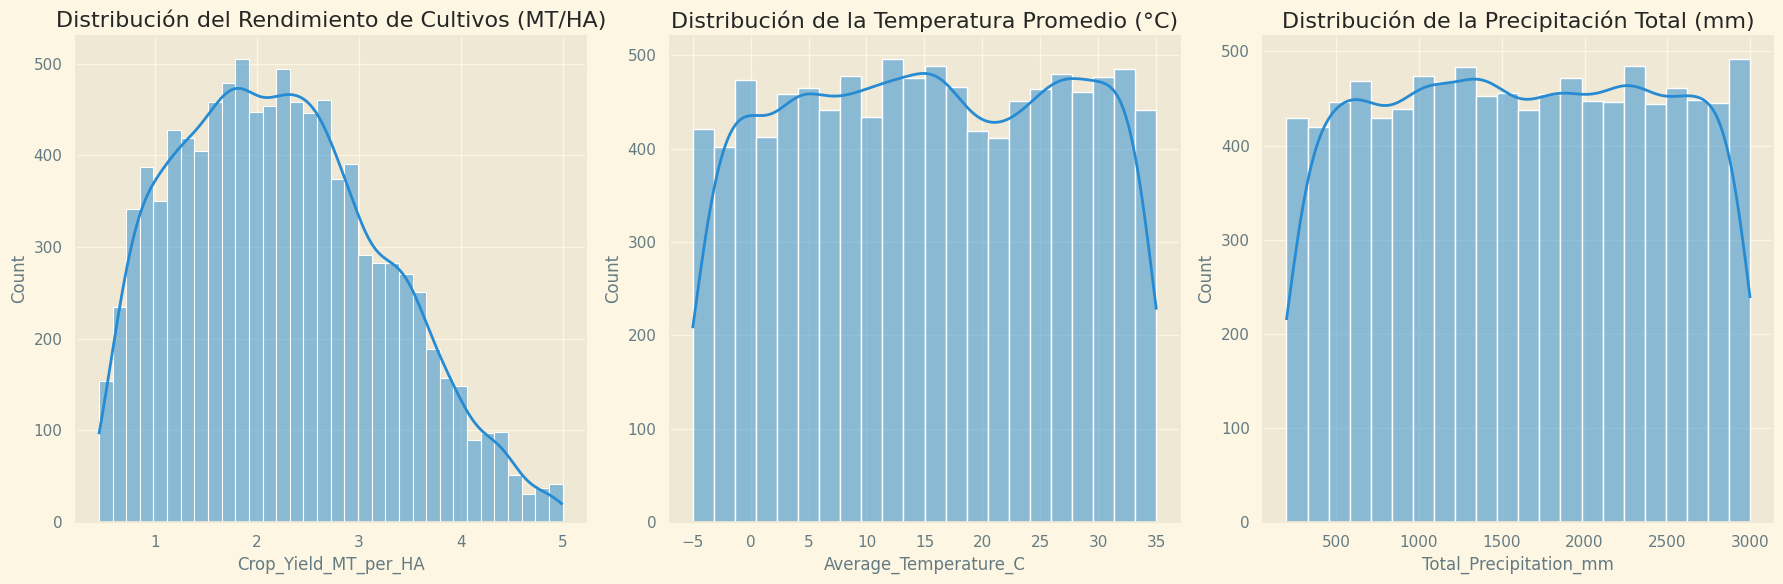

In [6]:
# Configuración de un estilo para los gráficos con seaborn.
sns.set(style="whitegrid", palette="muted")   # estilo moderno y colores suaves.
plt.style.use("Solarize_Light2")

# Visualización inicial de la distribución de algunas variables clave
plt.figure(figsize=(18, 6))   # define el tamaño del gráfico

plt.subplot(1, 3, 1)
sns.histplot(df['Crop_Yield_MT_per_HA'], kde=True)
plt.title('Distribución del Rendimiento de Cultivos (MT/HA)')

plt.subplot(1, 3, 2)
sns.histplot(df['Average_Temperature_C'], kde=True)
plt.title('Distribución de la Temperatura Promedio (°C)')

plt.subplot(1, 3, 3)
sns.histplot(df['Total_Precipitation_mm'], kde=True)
plt.title('Distribución de la Precipitación Total (mm)')

plt.tight_layout()
plt.savefig("visualizacion_variables.png")   # guarda la figura en un archivo
plt.show()   # muestra el gráfico

**Histograma del rendimiento de cultivos**

El histograma muestra cómo se distribuyen los valores de rendimiento en intervalos. La mayor frecuencia se encuentra entre 1.5 y 2.5 MT/HA, indicando que la mayoría de los cultivos tienen rendimientos dentro de ese rango. La curva de densidad sugiere que la distribución es asimétrica, con una ligera cola hacia la derecha (distribución sesgada positivamente). Además rendimientos extremos (muy bajos o my altos) son menos comunes.

En la temperaturas promedio la distribución es relativamente uniforme entre -5°C y 35°C, aunque hay ligeras caídas entre 15 y 20°C.
Esto indica que el conjunto de datos abarca una amplia gama de climas (desde fríos hasta cálidos), pero con una leve menor representación de temperaturas intermedias.

La distribución de la precipitación también es relativamente uniforme entre ~200 mm y 3000 mm.
Se nota una ligera concentración mayor en los extremos (tanto secos como húmedos), lo que podría indicar presencia de datos de zonas áridas y muy lluviosas.

**Gráfico de dispersión: Temperatura vs Rendimiento**

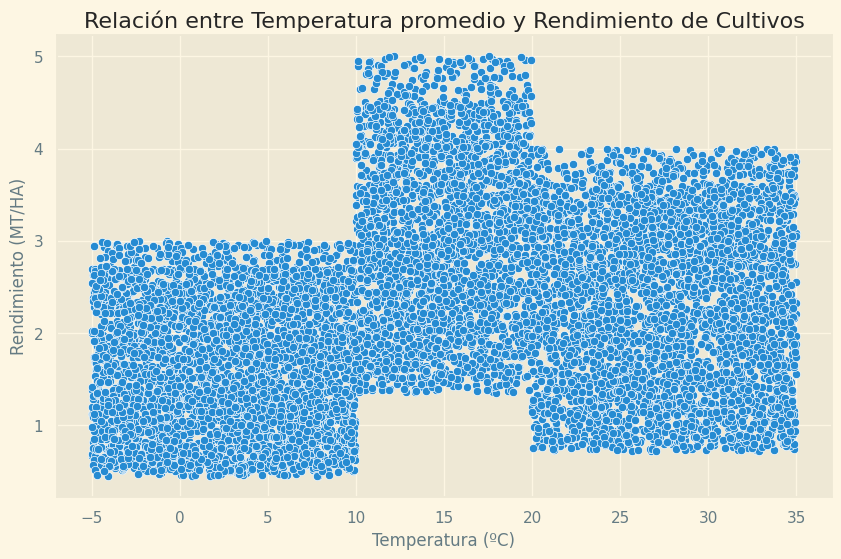

In [7]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))   # define el tamaño del gráfico
sns.scatterplot(x="Average_Temperature_C", y="Crop_Yield_MT_per_HA", data=df)   # gráfico de dispersión
plt.title("Relación entre Temperatura promedio y Rendimiento de Cultivos")   # título del gráfico
plt.xlabel("Temperatura (ºC)")   # etiqueta eje X
plt.ylabel("Rendimiento (MT/HA)")   # etiqueta eje Y
plt.savefig("grafico_dispersion.png")   # guarda la figura en un archivo
plt.show()   # muestra el gráfico

Hay una discontinuidad en los datos, lo cual indica que se trata de datos combinados de diferentes regiones o experimentos que no cubren todos los rangos de temperatura de manera continua.

Esto crea tres grupos visuales:

Uno con temperaturas de -5°C a ~10°C con rendimientos mayormente entre 0.5 y 3 MT/HA.

Otro entre 10°C y 20°C con un rango de rendimiento más amplio, hasta 5 MT/HA.

Y uno final de 20°C a 35°C, con rendimientos nuevamente entre 0.5 y 4 MT/HA, pero con una ligera tendencia a valores más bajos conforme aumenta la temperatura, es decir, que temperaturas extremadamente bajas o altas podrían estar asociadas a menores rendimientos, mientras que temperaturas moderadas favorecerían rendimientos más altos.

No se observa una relación lineal evidente entre temperatura y rendimiento.

**Gráfico de Impacto Económico por País**

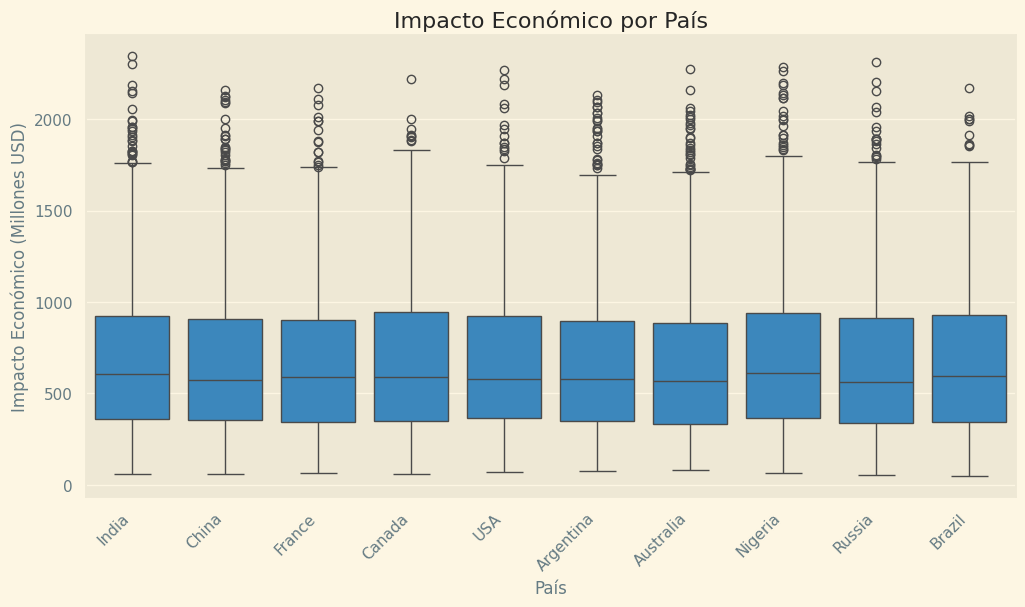

In [8]:
# Gráfico de caja
plt.figure(figsize=(12, 6))   #   tamaño del gráfico
sns.boxplot(x='Country', y='Economic_Impact_Million_USD', data=df)
plt.title('Impacto Económico por País')   # etiqueta eje X
plt.xlabel('País')   # etiqueta eje X
plt.ylabel('Impacto Económico (Millones USD)')   # etiqueta eje Y
plt.xticks(rotation=45, ha='right')
plt.savefig("grafico_boxplot.png")   # guarda la figura en un archivo
plt.show()   # muestra el gráfico

Todos los países tienen una distribución similar en forma y escala.

La mediana está aproximadamente entre 500 y 600 millones de USD para todos los países.

La altura de las cajas es bastante uniforme entre países, lo que indica variabilidad similar.

Los bigotes y outliers son abundantes y muy similares en todos los países, lo que puede indicar:
Que existen eventos extremos en todos ellos (posibles desastres, inversiones puntuales, etc.)
Que los datos tienen una distribución con cola larga a la derecha (es decir, unos pocos valores mucho mayores que el resto).

Outliers (valores extremos):
En todos los países se observa una gran cantidad de valores atípicos (por encima de ~1750 millones USD), lo que es común en datos económicos.

El impacto económico presenta un patrón bastante consistente entre países, lo que sugiere que:
No hay un país que claramente supere a los demás en impacto económico de forma sistemática (al menos en la mediana).

Todos experimentan eventos económicos extremos ocasionales.

Este gráfico es útil para detectar distribuciones anómalas o comparar la dispersión y los valores centrales entre países.

**Correlación entre variables númericas**

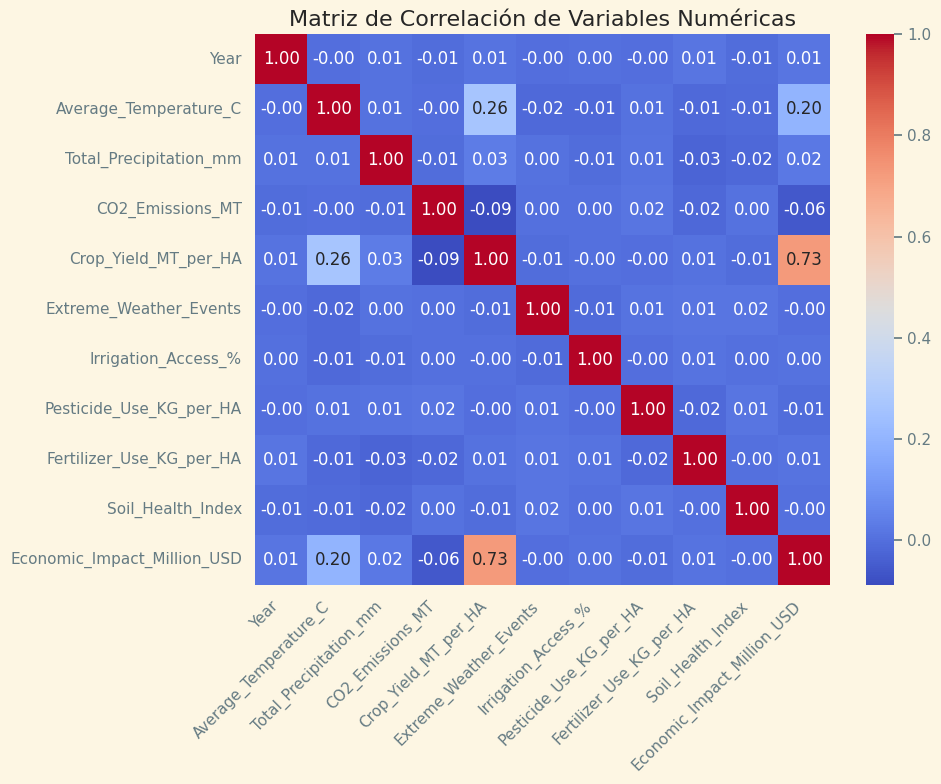

In [9]:
# Gráfico de correlación
plt.figure(figsize=(10, 8))   # tamaños del gráfico
# Seleccionar solo las columnas numéricas relevantes para la correlación
columnas_numericas = df.select_dtypes(include=np.number).columns
sns.heatmap(df[columnas_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')   # título del gráfico
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("grafico_correlacion.png")   # guardar la figura en un archivo
plt.show()   # muestra el gráfico

Existe una fuerte correlación entre
Crop_Yield_MT_per_HA y Economic_Impact_Million_USD: 0.73, es decir, a mayor rendimiento de cultivos, mayor impacto económico.

Mientras que la correlación entre Average_Temperature_C y Crop_Yield_MT_per_HA: 0.26, nos dice que a temperaturas más altas tiende a aumentar el rendimiento, aunque la relación no es muy fuerte.

Por otro lado la correlación entre Average_Temperature_C y Economic_Impact_Million_USD: 0.20, indica que las temperaturas más altas están asociadas con un mayor impacto económico, probablemente mediado por el rendimiento de los cultivos.

La mayoría de las correlaciones son cercanas a cero, lo que sugiere poca o ninguna relación lineal entre esas variables.

Por ejemplo:

Extreme_Weather_Events y cualquier otra variable ≈ 0

Soil_Health_Index con casi todo ≈ 0

Las relaciones negativas débiles:

CO2_Emissions_MT y Crop_Yield_MT_per_HA: -0.09 podría implicar que más emisiones se asocian ligeramente con menor rendimiento, pero el efecto es despreciable.

El uso de fertilizantes no parece afectar directamente la salud del suelo en este conjunto de datos, Fertilizer_Use_KG_per_HA y Soil_Health_Index: -0.01

⚠**Recordemos que estos datos son ficticios y su uso es unicamente académico.**⚠

## **Inferencia estadística**

La inferencia estadística es un conjunto de métodos que permiten extraer conclusiones sobre una población a partir del análisis de una muestra de datos.
Se basa en la teoría de la probabilidad para realizar generalizaciones y predicciones.

Se utilizan técnicas como:

Estimación de parámetros:
Se calcula un valor que representa una característica de la población (como la media o la proporción) a partir de la muestra.

Prueba de hipótesis:
Se evalúa si una afirmación sobre la población es compatible con los datos de la muestra.

Intervalos de confianza:
Se determina un rango de valores dentro del cual es probable que se encuentre el parámetro poblacional.

Se puede decir, que es fundamental en la investigación científica, el análisis de datos y la toma de decisiones, ya que permite extraer conclusiones significativas a partir de datos limitados.

In [14]:
# Inferencia estadística: Estimación
# Estimación de la media del rendimietno e intervalo de confianza al 95%

media_rendimiento = df["Crop_Yield_MT_per_HA"].mean()   # calcula la media del rendimiento
desviacion_rendimiento = df["Crop_Yield_MT_per_HA"].std()   # calcula la deviación estándar
n = len(df)   # tamaño de la muestra
error_estandar = desviacion_rendimiento / np.sqrt(n)   # error estándar de la media
intervalo_confianza = stats.t.interval(0.95, df=n-1, loc=media_rendimiento, scale=error_estandar)   # intervalo con t-student (para muestras)

print(f"Media del rendimiento: {media_rendimiento:.2f} MT/HA")
print(f"Intervalo de confianza al 95%: {intervalo_confianza}")

Media del rendimiento: 2.24 MT/HA
Intervalo de confianza al 95%: (np.float64(2.2204473969682446), np.float64(2.2595864030317556))


Cuando se calcula un intervalo de confianza (IC), nos interesa principalmente qué tan ancho es, porque eso refleja la precisión de la estimación:

Media muestral: 2.24 MT/HA

IC 95%: (2.220, 2.260)

Ancho del intervalo = 2.2596 – 2.2204 ≈ 0.0392 MT/HA

Si se compara con la media:

(0.0392 /  2.24)
×
100
≈
1.75%

Eso significa que la incertidumbre en torno a la media es de apenas ±1.75%, lo cual es bastante estrecho.

Este intervalo tan pequeño indica que los datos son consistentes y que la media de 2.24 MT/HA es una estimación muy precisa.

Seguramente se debe a que se tiene un número grande de observaciones o una variabilidad baja en los rendimientos.

En términos agrícolas, se podría afirmar con confianza que el rendimiento real promedio está prácticamente en ese rango (2.22–2.26 MT/HA), sin riesgo de que sea mucho mayor o menor.

Dicho de otra manera, el intervalo estrecho y preciso, es muy bueno estadísticamente. Cuanto más angosto es el IC, mayor seguridad se tiene de que el promedio calculado refleja la realidad.

**Estimación del rendimiento promedio del cultivo arroz en el país de la India**

## **Contraste de Hipótesis**

Un contraste de hipótesis es un procedimiento estadístico para decidir si una afirmación sobre una población (la hipótesis nula) es compatible con los datos de una muestra.

Se formula una hipótesis nula (H0) y una hipótesis alternativa (H1). Luego, se utiliza la información de la muestra para determinar si hay suficiente evidencia para rechazar H0 y, por lo tanto, aceptar H1. El proceso puede llevar a cometer errores de Tipo I (rechazar una hipótesis nula verdadera) o errores de Tipo II (aceptar una hipótesis nula falsa).

De manera educativa haremos la siguiente hipótesis: El rendimiento promedio después de 2010 es menor que años anteriores

HO: No hay diferencia en el rendimiento promedio después del 2010 respecto a antes del 2010.

H1: El rendimiento promedio después de 2010 es menor que el de antes de 2010.

In [27]:
# Contraste de hipótesis
df_pre_2010 = df[df["Year"] <= 2010]["Crop_Yield_MT_per_HA"]   # filtra datos antes o en 2010
df_post_2010 = df[df["Year"] > 2010]["Crop_Yield_MT_per_HA"]   # filtra datos después de 2010

t_stat, p_value = stats.ttest_ind(df_pre_2010, df_post_2010, equal_var=False, alternative="less")  # t-test independiente de una cola

print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")
if p_value < 0.05:
  print ("Se rechaza la hipotesis nula, el rendimiento promedio después de 2010 es menor que el de antes de 2010.")
else:
  print ("No se rechaza la hipotesis nula, no hay suficiente evidencia que demuestre que el rendimiento haya disminuido después del 2010.")

Estadístico t: -1.27
Valor p: 0.1026
No se rechaza la hipotesis nula, no hay suficiente evidencia que demuestre que el rendimiento haya disminuido después del 2010.


Ya que el resultado de p_value = 0.1026, no existe evidencia suficiente que demuestre una baja en el rendimiento de los cultivos. Por ende non se rechaza la hipótesis nula.

Como parte educativa realizaremos otro contraste de hipótesis, esta vez pondremos bajo observación el rendimiento promedio de los cultivos entre las estrategias de adptación, como el manejo de agua y sin adaptación.

HO: No hay diferencia significativa en el rendimiento entre manejo del agua y sin adaptación del cultivo.

H1: Hay una diferencia significativa en el rendimiento entre m,anejo del agua y sin adaptación del cultivo.

In [29]:
# Contraste de hipótesis
rendimiento_agua = df[df["Adaptation_Strategies"] == "Water Management"]["Crop_Yield_MT_per_HA"]   # filtra datos con manejo del agua
rendimiento_sin_agua = df[df["Adaptation_Strategies"] == "No Adaptation"]["Crop_Yield_MT_per_HA"]   # filtra datos sin manejo del agua

print(f"Media de rendimiento (Water Management): {np.mean(rendimiento_agua):.2f}")
print(f"Media de rendimiento (No Adaptation): {np.mean(rendimiento_sin_agua):.2f}")
print(f"Tamaño de muestra (Water Management): {len(rendimiento_agua)}")
print(f"Tamaño de muestra (No Adaptation): {len(rendimiento_sin_agua)}")

# Nivel de significancia
alpha = 0.05

#Realizar test t de student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(rendimiento_agua, rendimiento_sin_agua, equal_var=False)

print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")
print(f"Nivel de significancia: {alpha}")
if p_value < alpha:
  print(f"Dado que el Valor P ({p_value:.3f}) < α ({alpha}), RECHAZAMOS la hipótesis nula.")
  print("Conclusión: Existe una diferencia estadísticamente significativa en el rendimiento promedio de los cultivos")
  print("entre las estrategias de 'Water Management' y 'No Adaptation'.")
else:
  print(f"Dado que el Valor P ({p_value:.3f}) ≥ α ({alpha}), NO RECHAZAMOS la hipótesis nula.")
  print("Conclusión: No existe evidencia estadística suficiente para afirmar una diferencia significativa en el rendimiento promedio de los cultivos")
  print("entre las estrategias de 'Water Management' y 'No Adaptation'.")

Media de rendimiento (Water Management): 2.21
Media de rendimiento (No Adaptation): 2.24
Tamaño de muestra (Water Management): 2049
Tamaño de muestra (No Adaptation): 2024
Estadístico t: -0.91
Valor p: 0.3635
Nivel de significancia: 0.05
Dado que el Valor P (0.363) ≥ α (0.05), NO RECHAZAMOS la hipótesis nula.
Conclusión: No existe evidencia estadística suficiente para afirmar una diferencia significativa en el rendimiento promedio de los cultivos
entre las estrategias de 'Water Management' y 'No Adaptation'.


**Conclusión**

En este proyecto, se ha explorado el dataset simulado sobre el impacto del cambio climático en la agricultura, teniendo un enfoque en inferencia estadística y contrastes de hipótesis para extraer insights educativos. Aunque los datos no son reales y no deben usarse para decisiones políticas o pronósticos, permite demostrar conceptos clave de análisis de datos. A continuación, se resume los hallazgos principales:

Exploración de Datos (EDA):

El dataset contiene 10,000 observaciones con 15 variables, sin valores nulos, lo que facilita el análisis.
El rendimiento promedio de los cultivos es de 2.24 MT/HA, con una distribución aproximadamente normal (confirmada por el histograma). Esto indica una variabilidad moderada en los rendimientos, posiblemente influida por factores climáticos.
Visualizaciones como el scatter plot de temperatura vs. rendimiento indican posibles correlaciones negativas (a mayor temperatura, menor rendimiento).

Inferencia Estadística - Estimación:

La media muestral del rendimiento es de 2.24 MT/HA, con un intervalo de confianza al 95% de (2.22, 2.26) MT/HA. Este intervalo es muy estrecho (ancho aproximado de 0.039 MT/HA, o ~1.75% de la media), lo que indica una estimación precisa y consistente. Con un tamaño de muestra grande (10,000 observaciones), se tiene alta confianza en que el rendimiento poblacional real se encuentra en este rango. Esto refleja baja variabilidad en los datos simulados y refuerza la utilidad del dataset para fines educativos.

Contraste de Hipótesis:

Hipótesis 1: Rendimiento pre- vs. post-2010: No se rechazó la hipótesis nula (p-value = 0.1026 > 0.05). No hay evidencia estadística suficiente para afirmar que el rendimiento de los cultivos ha disminuido significativamente después de 2010 debido al cambio climático simulado. Esto podría indicar que, en este dataset ficticio, factores como el aumento de temperatura o emisiones de CO2 no han impactado drásticamente el rendimiento en las últimas décadas.

Hipótesis 2: Estrategias de adaptación (Water Management vs. No Adaptation): No se rechazó la hipótesis nula (p-value = 0.3635 > 0.05). Las medias de rendimiento son similares (2.21 MT/HA para Water Management y 2.24 MT/HA para No Adaptation), y no hay diferencia estadísticamente significativa. Esto sugiere que, en los datos simulados, las estrategias de adaptación no marcan una diferencia clara en el rendimiento, posiblemente porque otros factores (como precipitación o salud del suelo) dominan.

Limitaciones y Consideraciones Educativas:

Dado que el dataset es simulado, los resultados no reflejan la realidad agrícola global, donde el cambio climático sí ha demostrado impactos negativos (ejemplo, sequías y eventos extremos). Este análisis sirve para practicar técnicas estadísticas, pero en datos reales, podríamos observar p-values más bajos y efectos significativos.